In [3]:
import numpy as np
import pandas as pd
import json
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## 1. ERD

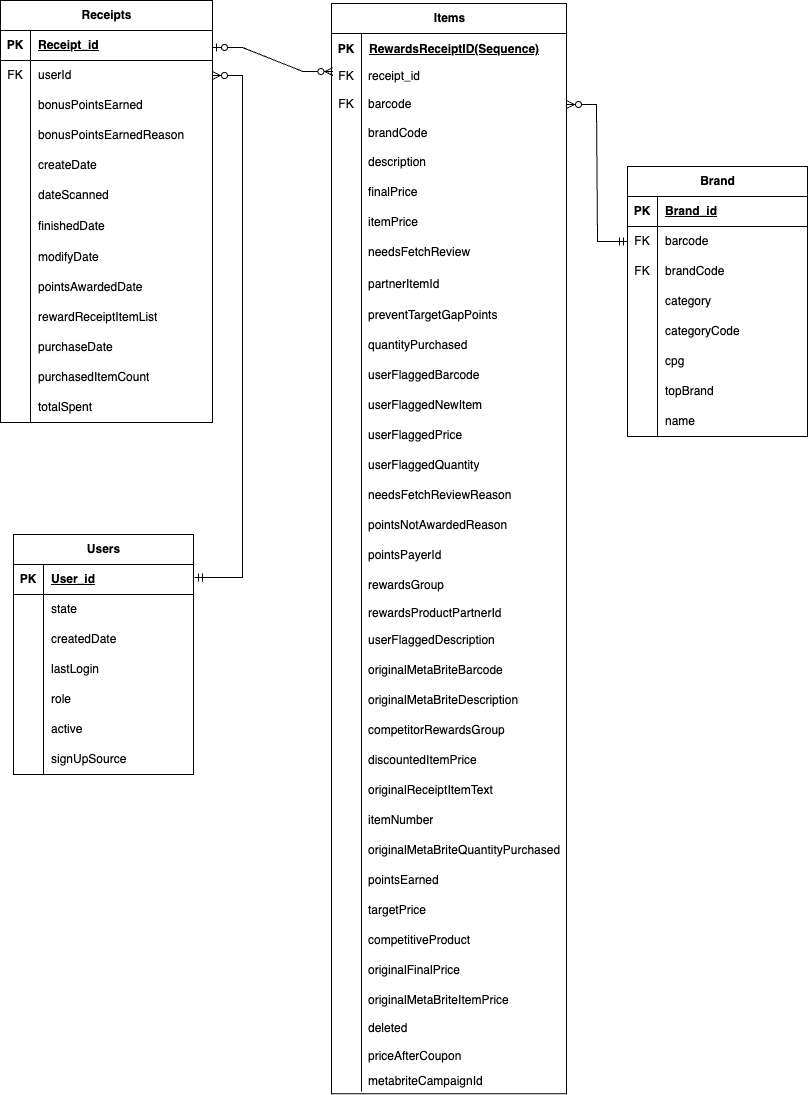

## Dataset Examination & ER Model Building

### Receipts

In [4]:
receipts = pd.read_json('./receipts.json.gz',lines=True)
receipts.head(5)

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [5]:
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      1119 non-null   object 
 1   bonusPointsEarned        544 non-null    float64
 2   bonusPointsEarnedReason  544 non-null    object 
 3   createDate               1119 non-null   object 
 4   dateScanned              1119 non-null   object 
 5   finishedDate             568 non-null    object 
 6   modifyDate               1119 non-null   object 
 7   pointsAwardedDate        537 non-null    object 
 8   pointsEarned             609 non-null    float64
 9   purchaseDate             671 non-null    object 
 10  purchasedItemCount       635 non-null    float64
 11  rewardsReceiptItemList   679 non-null    object 
 12  rewardsReceiptStatus     1119 non-null   object 
 13  totalSpent               684 non-null    float64
 14  userId                  

In [6]:
receipts['rewardsReceiptItemList'][0]

[{'barcode': '4011',
  'description': 'ITEM NOT FOUND',
  'finalPrice': '26.00',
  'itemPrice': '26.00',
  'needsFetchReview': False,
  'partnerItemId': '1',
  'preventTargetGapPoints': True,
  'quantityPurchased': 5,
  'userFlaggedBarcode': '4011',
  'userFlaggedNewItem': True,
  'userFlaggedPrice': '26.00',
  'userFlaggedQuantity': 5}]

> From a brief examination, we can see that the date variables and _id need some clean-ups. Specially we need to remove the key and convert date type for date objects. Moreover, we can observe that there's nested information (a dictionary of key-value pairs in a list) under the column `rewardsReceiptItemList`. To deal with this column, we need to create another dataframe to extract information.

In [7]:
## Remove the key
receipts['_id'] = receipts['_id'].apply(lambda x: x['$oid'])

## Convert the date variables to date time
date_list = ['createDate','dateScanned','finishedDate','modifyDate','pointsAwardedDate','purchaseDate']

for each in date_list:
    receipts[each] = receipts[each].apply(lambda x: datetime.fromtimestamp(float(x['$date'])//1000) if isinstance(x,dict) else x)

In [8]:
receipts.sample(5)

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
112,5ff5d1d00a7214ada10005f2,750.0,"Receipt number 1 completed, bonus point schedu...",2021-01-06 10:05:52,2021-01-06 10:05:52,2021-01-06 10:05:53,2021-01-06 10:05:53,2021-01-06 10:05:53,1800.0,2021-01-06 10:05:52,1.0,"[{'barcode': '043000023440', 'description': 'K...",FINISHED,10.00,5ff5d1d08f142f11dd18884c
675,60189c9c0a7214ad28000045,5.0,All-receipts receipt bonus,2021-02-01 19:28:12,2021-02-01 19:28:12,2021-02-01 19:28:13,2021-02-01 19:28:17,2021-02-01 19:28:13,5.0,2021-02-01 19:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,27.00,60189c94c8b50e11d8454f6b
1043,6039b8a20a7217c72c000164,NaN,NaN,2021-02-26 22:12:34,2021-02-26 22:12:34,NaT,2021-02-26 22:12:34,NaT,NaN,NaT,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
303,600208270a720f05f3000088,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-15 16:24:55,2021-01-15 16:24:55,2021-01-15 16:26:19,2021-01-15 16:26:29,2021-01-15 16:26:19,605.7,2021-01-08 19:00:00,103.0,"[{'brandCode': 'HY-VEE', 'description': 'HYV G...",FINISHED,427.81,6000b75bbe5fc96dfee1d4d3
261,5fff26d70a7214ad4c00000f,5.0,All-receipts receipt bonus,2021-01-13 11:59:03,2021-01-13 11:59:03,2021-01-13 11:59:09,2021-01-13 11:59:09,2021-01-13 11:59:03,5.0,2021-01-12 11:59:03,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5fff2698b3348b03eb45bb10


In [9]:
receipts['_id'].is_unique

True

> Thus the receipt id could be seen as primary key.

In [10]:
## Create an item dataframe to get rewardsReceiptItemList
reward_col = receipts['rewardsReceiptItemList'].explode().reset_index().rename(columns={'index':'receipt_idx'})
receipt_idx = receipts['_id'].reset_index().rename(columns={'index':'receipt_idx'})
temp = receipt_idx.merge(reward_col,on='receipt_idx',how='left')
items = pd.json_normalize(temp['rewardsReceiptItemList'])
## Here I added the id column back to the dataframe
items['_id'] = temp['_id']
items


,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId,_id
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1eb0a720f0523000575
1,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1bb0a720f052300056b
2,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1bb0a720f052300056b
3,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1f10a720f052300057a
4,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1ee0a7214ada100056f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,603d0b710a720fde1000042a
7377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,603cf5290a720fde10000413
7378,B076FJ92M4,mueller austria hypergrind precision electric ...,22.97,22.97,NaN,0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN,603ce7100a7217c72c000405
7379,B07BRRLSVC,thindust summer face mask - sun protection nec...,11.99,11.99,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN,603ce7100a7217c72c000405


In [11]:
items.columns

Index(['barcode', 'description', 'finalPrice', 'itemPrice', 'needsFetchReview',
       'partnerItemId', 'preventTargetGapPoints', 'quantityPurchased',
       'userFlaggedBarcode', 'userFlaggedNewItem', 'userFlaggedPrice',
       'userFlaggedQuantity', 'needsFetchReviewReason',
       'pointsNotAwardedReason', 'pointsPayerId', 'rewardsGroup',
       'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned', 'targetPrice',
       'competitiveProduct', 'originalFinalPrice',
       'originalMetaBriteItemPrice', 'deleted', 'priceAfterCoupon',
       'metabriteCampaignId', '_id'],
      dtype='object')

### Users

In [12]:
users = pd.read_json('./users.json.gz',lines=True)
users.sample(5)

,_id,active,createdDate,lastLogin,role,signUpSource,state
249,{'$oid': '6009885c50b33111fd61eee9'},True,{'$date': 1611237468490},{'$date': 1611237468698},consumer,Email,WI
291,{'$oid': '600fb1ac73c60b12049027bb'},True,{'$date': 1611641260879},{'$date': 1611641483950},consumer,Email,WI
297,{'$oid': '600fb1e4a4b74c120bd18777'},True,{'$date': 1611641316799},{'$date': 1611641317094},consumer,Email,WI
248,{'$oid': '600988557d983a11f63d08ef'},True,{'$date': 1611237461269},{'$date': 1611237461485},consumer,Email,WI
393,{'$oid': '60229990b57b8a12187fe9e0'},True,{'$date': 1612880272581},{'$date': 1612880272626},consumer,Email,WI


In [13]:
users.columns

Index(['_id', 'active', 'createdDate', 'lastLogin', 'role', 'signUpSource',
       'state'],
      dtype='object')

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _id           495 non-null    object
 1   active        495 non-null    bool  
 2   createdDate   495 non-null    object
 3   lastLogin     433 non-null    object
 4   role          495 non-null    object
 5   signUpSource  447 non-null    object
 6   state         439 non-null    object
dtypes: bool(1), object(6)
memory usage: 23.8+ KB


In [15]:
users['_id'] = users['_id'].apply(lambda x: x['$oid'])

In [16]:
date_list = ['createdDate','lastLogin']

for each in date_list:
    users[each] = users[each].apply(lambda x: datetime.fromtimestamp(float(x['$date'])//1000) if isinstance(x,dict) else x)

In [17]:
users

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 10:24:04,2021-01-03 10:25:37,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 10:24:04,2021-01-03 10:25:37,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 10:24:04,2021-01-03 10:25:37,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 10:25:30,2021-01-03 10:25:30,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 10:24:04,2021-01-03 10:25:37,consumer,Email,WI
...,...,...,...,...,...,...,...
490,54943462e4b07e684157a532,True,2014-12-19 09:21:22,2021-03-05 11:52:23,fetch-staff,NaN,NaN
491,54943462e4b07e684157a532,True,2014-12-19 09:21:22,2021-03-05 11:52:23,fetch-staff,NaN,NaN
492,54943462e4b07e684157a532,True,2014-12-19 09:21:22,2021-03-05 11:52:23,fetch-staff,NaN,NaN
493,54943462e4b07e684157a532,True,2014-12-19 09:21:22,2021-03-05 11:52:23,fetch-staff,NaN,NaN


In [18]:
users['_id'].is_unique

False

Here we see that the user id is repetitive. However, I believe it is more like a data problem rather than abandoning it as a primary key.

In [19]:
users['role'].value_counts()

role
consumer       413
fetch-staff     82
Name: count, dtype: int64

### Brand

In [20]:
brand = pd.read_json('./brands.json.gz',lines=True)
brand.head(5)

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [21]:
brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           1167 non-null   object 
 1   barcode       1167 non-null   int64  
 2   category      1012 non-null   object 
 3   categoryCode  517 non-null    object 
 4   cpg           1167 non-null   object 
 5   name          1167 non-null   object 
 6   topBrand      555 non-null    float64
 7   brandCode     933 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 73.1+ KB


In [22]:
brand['_id'] = brand['_id'].apply(lambda x: x['$oid'])

In [23]:
brand['_id'].is_unique

True

In [24]:
cpg = pd.json_normalize(brand['cpg']).rename(columns={'$ref':'Ref','$id.$oid':'oid'})
cpg['id'] = brand['_id']
cpg

,Ref,oid,id
0,Cogs,601ac114be37ce2ead437550,601ac115be37ce2ead437551
1,Cogs,5332f5fbe4b03c9a25efd0ba,601c5460be37ce2ead43755f
2,Cogs,601ac142be37ce2ead437559,601ac142be37ce2ead43755d
3,Cogs,601ac142be37ce2ead437559,601ac142be37ce2ead43755a
4,Cogs,5332fa12e4b03c9a25efd1e7,601ac142be37ce2ead43755e
...,...,...,...
1162,Cogs,5f77274dbe37ce6b592e90bf,5f77274dbe37ce6b592e90c0
1163,Cogs,53e10d6368abd3c7065097cc,5dc1fca91dda2c0ad7da64ae
1164,Cogs,5332fa12e4b03c9a25efd1e7,5f494c6e04db711dd8fe87e7
1165,Cogs,5332f5f6e4b03c9a25efd0b4,5a021611e4b00efe02b02a57


In [25]:
full_brand = brand.merge(cpg, left_on = '_id', right_on ='id')
full_brand = full_brand.drop(columns=['cpg','id'])
full_brand.sample(5)

,_id,barcode,category,categoryCode,name,topBrand,brandCode,Ref,oid
255,5fb80d7cbe37ce522e165cd2,511111417613,Beer Wine Spirits,BEER_WINE_SPIRITS,Malibu® Original,0.0,MALIBU,Cogs,5fb6d381be37ce522e165cbd
903,5ff3842bbe37ce2c56dacbb1,511111218579,Baking,BAKING,test brand @1609794603367,0.0,TEST BRANDCODE @1609794603367,Cogs,5ff3842bbe37ce2c56dacbad
202,58861c7e4e8d0d20bc42c4de,511111901426,Beer Wine Spirits,NaN,Grolsch Lager,0.0,GROLSCH,Cogs,5332f709e4b03c9a25efd0f1
741,60074277be37ce360be63a01,511111619826,Baking,BAKING,test brand @1611088503776,0.0,TEST BRANDCODE @1611088503776,Cogs,60074277be37ce360be639fe
186,5ffe35eabe37ce5e01754c48,511111719397,Baking,BAKING,test brand @1610495466250,0.0,TEST BRANDCODE @1610495466250,Cogs,5ffe35eabe37ce5e01754c45


## 2. Query

What are the top 5 brands by receipts scanned for most recent month?

> Here I will use MySQL to query.

In [ ]:
-- Use a temp table to find out the number of receipts by brand
With receipts_by_brand AS (
        SELECT i.brandCode, COUNT(DISTINCT r.receipt_id) AS num_receipts
        FROM receipts r
        LEFT JOIN items i 
        ON r.receipt_id = i.receipt_id
        WHERE r.dateScanned BETWEEN r.dateScanned < DATE_FORMAT(CURRENT_DATE(), '%Y-%m-01') AND
                DATE_FORMAT(DATE_SUB(CURRENT_DATE(), INTERVAL 1 MONTH), '%Y-%m-01')
        GROUP BY i.brandCode
) 
-- Use dense rank to find rank and ties of brands as there might ties among brands
SELECT i.brandCode, num_receipts, DENSE_RANK() OVER (ORDER BY num_receipts DESC) AS brand_rank
FROM receipts_by_brand
-- Find the top 5 brands
HAVING brand_rank <= 5;

## 3. Data Quality

### Missing Values

In this part I will first ignored detailed examinations of `rewardsReceiptItemList` as it itself is worthy of exploration and data quality check.

Here we need to examine missing values.

In [ ]:
def plot_missing_vals(df,cat_col,num_col,df_name):
    missing_proportion_cat = df[cat_col].isnull().mean().sort_values(ascending=False)
    missing_proportion_num = df[num_col].isnull().mean().sort_values(ascending=False)

    missing_proportion = pd.concat([missing_proportion_num,missing_proportion_cat], axis=1)
    missing_proportion.columns = ['Numerical','Categorical']

    plt.figure(figsize=(12, 6))
    sns.barplot(data=missing_proportion.reset_index(), x='index', y='Categorical', color='skyblue', label='Categorical', dodge=True)
    sns.barplot(data=missing_proportion.reset_index(), x='index', y='Numerical', color='salmon', label='Numerical', dodge=True)

    plt.title(f'Proportion of Missing Values by All Columns for {df_name} Dataset')
    plt.xlabel('Columns')
    plt.ylabel('Proportion of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0,1)
    plt.legend(title='Type')

    plt.tight_layout()
    plt.show()

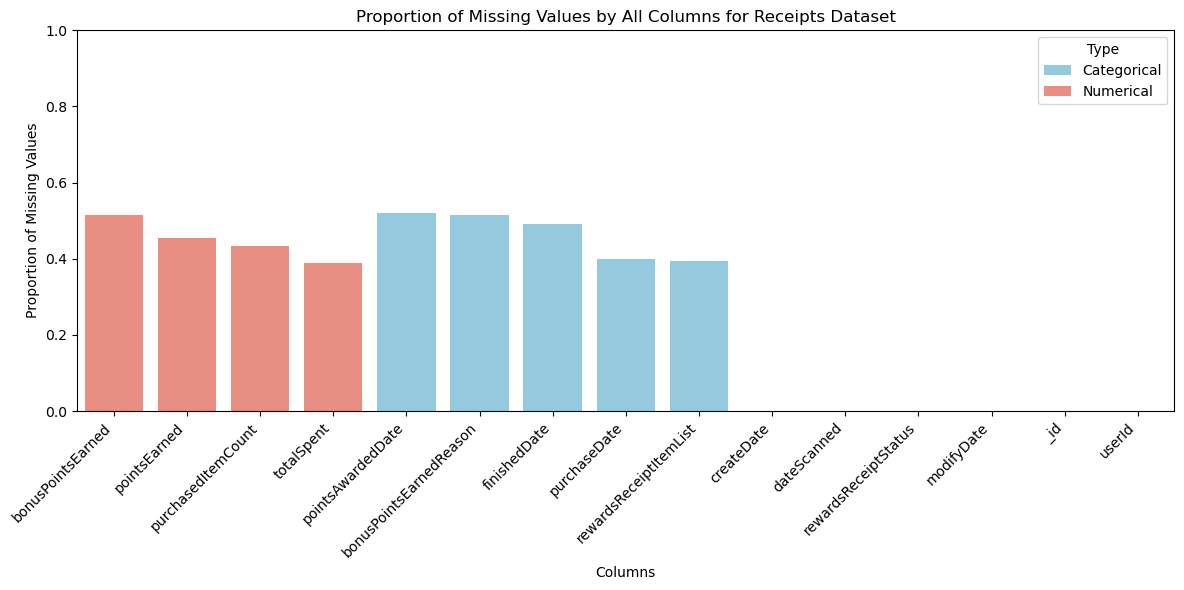

In [ ]:
### Receipts
cat_col = ['bonusPointsEarnedReason', 'createDate','dateScanned', 'rewardsReceiptStatus',
'finishedDate','modifyDate','pointsAwardedDate','purchaseDate','_id','userId','rewardsReceiptItemList']
num_col = ['bonusPointsEarned','pointsEarned','purchasedItemCount','totalSpent']
date_col = ['createDate','dateScanned','finishedDate','modifyDate','pointsAwardedDate','purchaseDate']

plot_missing_vals(receipts,cat_col,num_col,'Receipts')

In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   barcode                             3090 non-null   object 
 1   description                         6560 non-null   object 
 2   finalPrice                          6767 non-null   object 
 3   itemPrice                           6767 non-null   object 
 4   needsFetchReview                    813 non-null    object 
 5   partnerItemId                       6941 non-null   object 
 6   preventTargetGapPoints              358 non-null    object 
 7   quantityPurchased                   6767 non-null   float64
 8   userFlaggedBarcode                  337 non-null    object 
 9   userFlaggedNewItem                  323 non-null    object 
 10  userFlaggedPrice                    299 non-null    object 
 11  userFlaggedQuantity                 299 non

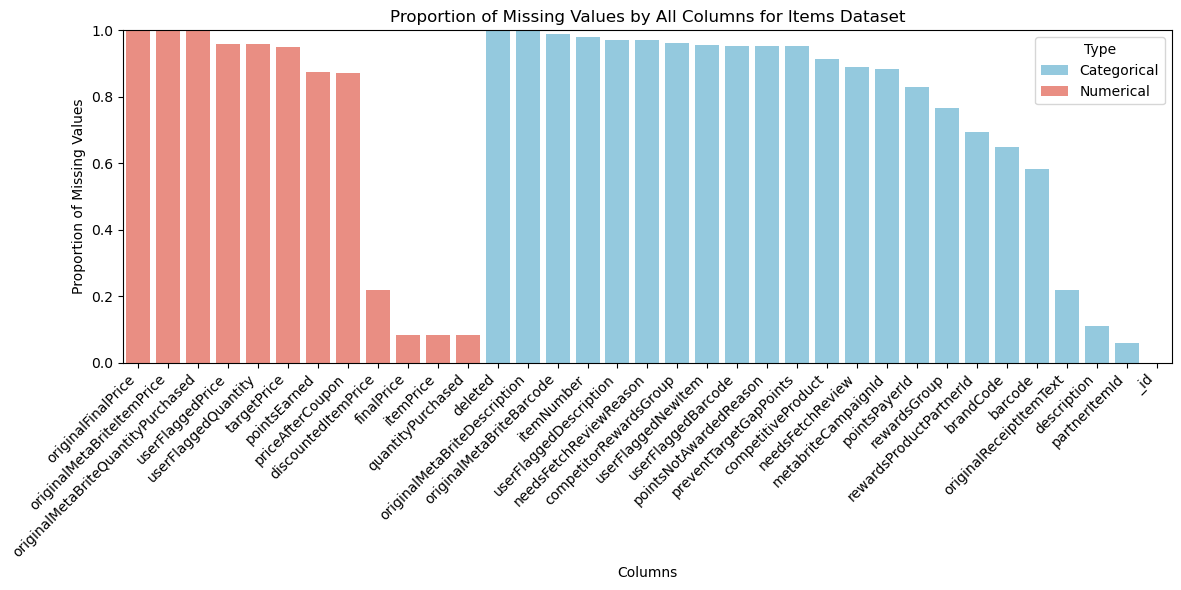

In [ ]:
### Items

cat_col = [
    'barcode', 'description', 'needsFetchReview', 
    'partnerItemId', 'preventTargetGapPoints', 'userFlaggedBarcode', 
    'userFlaggedNewItem', 'needsFetchReviewReason', 
    'pointsNotAwardedReason', 'rewardsGroup', 
    'rewardsProductPartnerId', 'userFlaggedDescription', 
    'originalMetaBriteBarcode', 'originalMetaBriteDescription', 
    'brandCode', 'competitorRewardsGroup', 
    'originalReceiptItemText', 'itemNumber', 'competitiveProduct',
     'deleted', 'metabriteCampaignId', '_id', 'pointsPayerId',
]

# Numerical columns
num_col = [
    'finalPrice', 'userFlaggedPrice','itemPrice','quantityPurchased', 'userFlaggedQuantity',
    'originalMetaBriteQuantityPurchased','discountedItemPrice', 
    'pointsEarned',  'originalFinalPrice', 'originalMetaBriteItemPrice',
    'targetPrice', 'priceAfterCoupon', 
]

plot_missing_vals(items,cat_col,num_col,'Items')

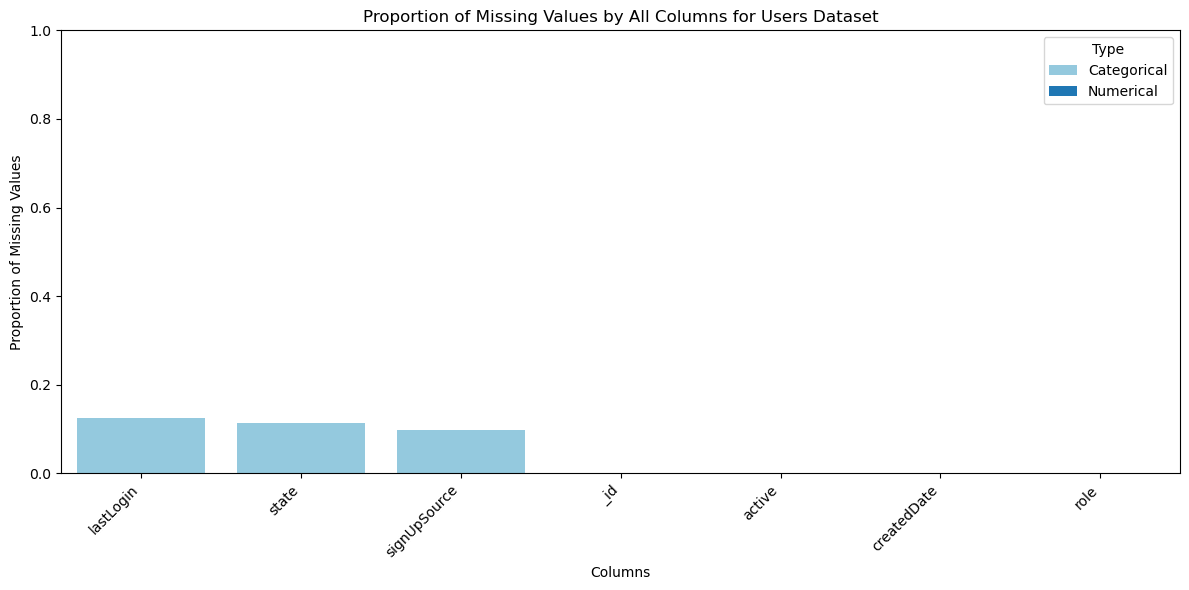

In [ ]:
### Users

cat_col = ['_id','active','createdDate','lastLogin','role','signUpSource','state']
num_col = []

plot_missing_vals(users,cat_col,num_col,'Users')


In [ ]:
brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           1167 non-null   object 
 1   barcode       1167 non-null   int64  
 2   category      1012 non-null   object 
 3   categoryCode  517 non-null    object 
 4   cpg           1167 non-null   object 
 5   name          1167 non-null   object 
 6   topBrand      555 non-null    float64
 7   brandCode     933 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 73.1+ KB


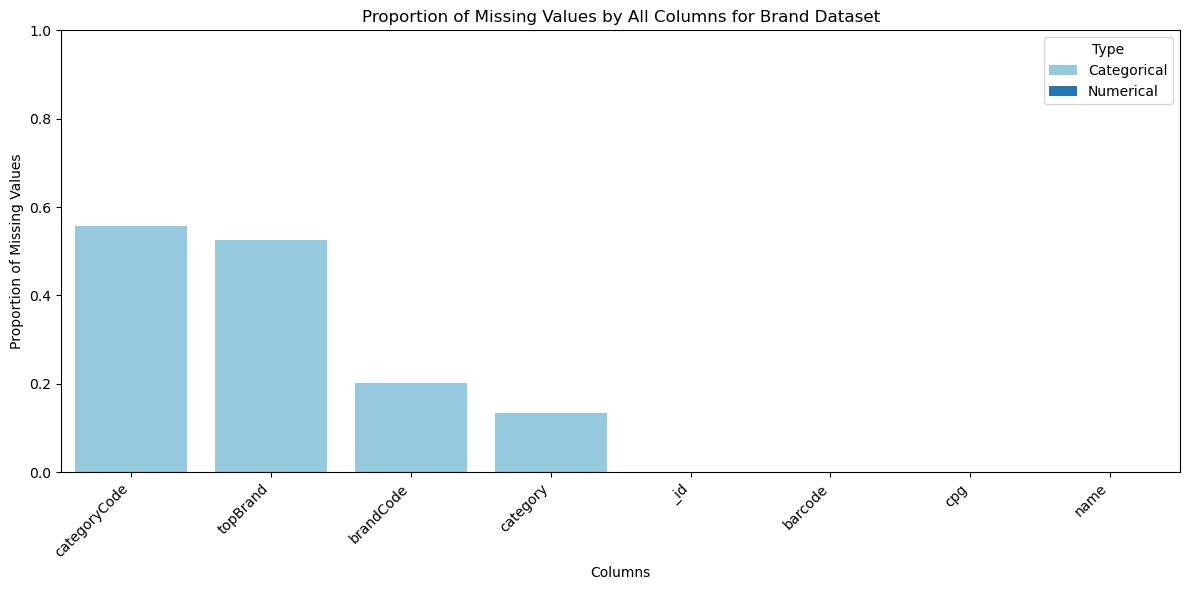

In [ ]:
### Brand
cat_col = ['_id', 'barcode', 'category', 'categoryCode', 'cpg', 'name', 'topBrand', 'brandCode']
num_col = []

plot_missing_vals(brand,cat_col,num_col,'Brand')

> Here we can see there are a lot of missing columns in the `Item` and `Receipts` dataset. For `Item` information, most information in a **large** amount of proportions appears missing. For `Receipts`, among all 15 columns, 4 are numerical columns and all have proportion of missing values over 0.35. Among 11 categorical variables, 5 columns are missing, 3 of which are date variables. These missing categorical variables all have about more than 0.35 missing proportion. `Users` data has the least missing information whereas the `Brand` dataset has two columns, categorycode and topbrand have over 50% data missing. 
> Missing data is quite normal in real world data, but when the proportion, such as those in `Item` dataset, seems off. Therefore, we might need to dig a bit more what contributes the missingness and whether such reasons are reasonable and whether such will impact business decisions.

> Here I also put the columns into the categorical and numerical ones because whether a data is categorical and numeric will impact data analysis and also we might need to use different imputation methods if imputation is needed.

### Duplicates

> When I first examined the three tables, the user id in the `user` table, which is supposed to be a primary key, has duplicates. The role column in `user,` said to only have one value, has `consumers` and `fetch staff`.

> Here we also want to check if there are duplicate rows.

In [40]:
### Receipts
## rewardsReceiptItemList is a list so need to drop first to compre duplicates
check_receipts = receipts.drop(columns=['rewardsReceiptItemList'])
check_receipts.duplicated().any()

False

In [47]:
### Users
check_users = users.duplicated().any()
users[users.duplicated()]

,_id,active,createdDate,lastLogin,role,signUpSource,state
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 10:24:04,2021-01-03 10:25:37,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 10:24:04,2021-01-03 10:25:37,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 10:24:04,2021-01-03 10:25:37,consumer,Email,WI
5,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 10:24:04,2021-01-03 10:25:37,consumer,Email,WI
8,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 10:24:04,2021-01-03 10:25:37,consumer,Email,WI
...,...,...,...,...,...,...,...
490,54943462e4b07e684157a532,True,2014-12-19 09:21:22,2021-03-05 11:52:23,fetch-staff,NaN,NaN
491,54943462e4b07e684157a532,True,2014-12-19 09:21:22,2021-03-05 11:52:23,fetch-staff,NaN,NaN
492,54943462e4b07e684157a532,True,2014-12-19 09:21:22,2021-03-05 11:52:23,fetch-staff,NaN,NaN
493,54943462e4b07e684157a532,True,2014-12-19 09:21:22,2021-03-05 11:52:23,fetch-staff,NaN,NaN


In [50]:
### Brand
check_brand = full_brand.duplicated().any()
check_brand

False

> There are significiant duplicates in `Users` table with 283 repeitive rows.

### Distribution

In [ ]:
def plot_distribution(df, num_cols, name):
    num_cols_per_row = 2
    num_rows_per_col = len(num_cols) // num_cols_per_row
    fig, axes = plt.subplots(nrows=num_rows_per_col, ncols=num_cols_per_row, figsize=(15, 10))
    
    for i, col in enumerate(num_cols):
        row_index = i // num_cols_per_row
        col_index = i % num_cols_per_row
        sns.histplot(df[col], ax=axes[row_index, col_index])
        axes[row_index, col_index].set_title(col)
        axes[row_index, col_index].set_xlabel('Values')
        axes[row_index, col_index].set_ylabel('Frequency')
    
    fig.suptitle(f'Distribution of Numerical Columns for {name} Dataset', fontsize=16)
    plt.tight_layout()
    plt.show()

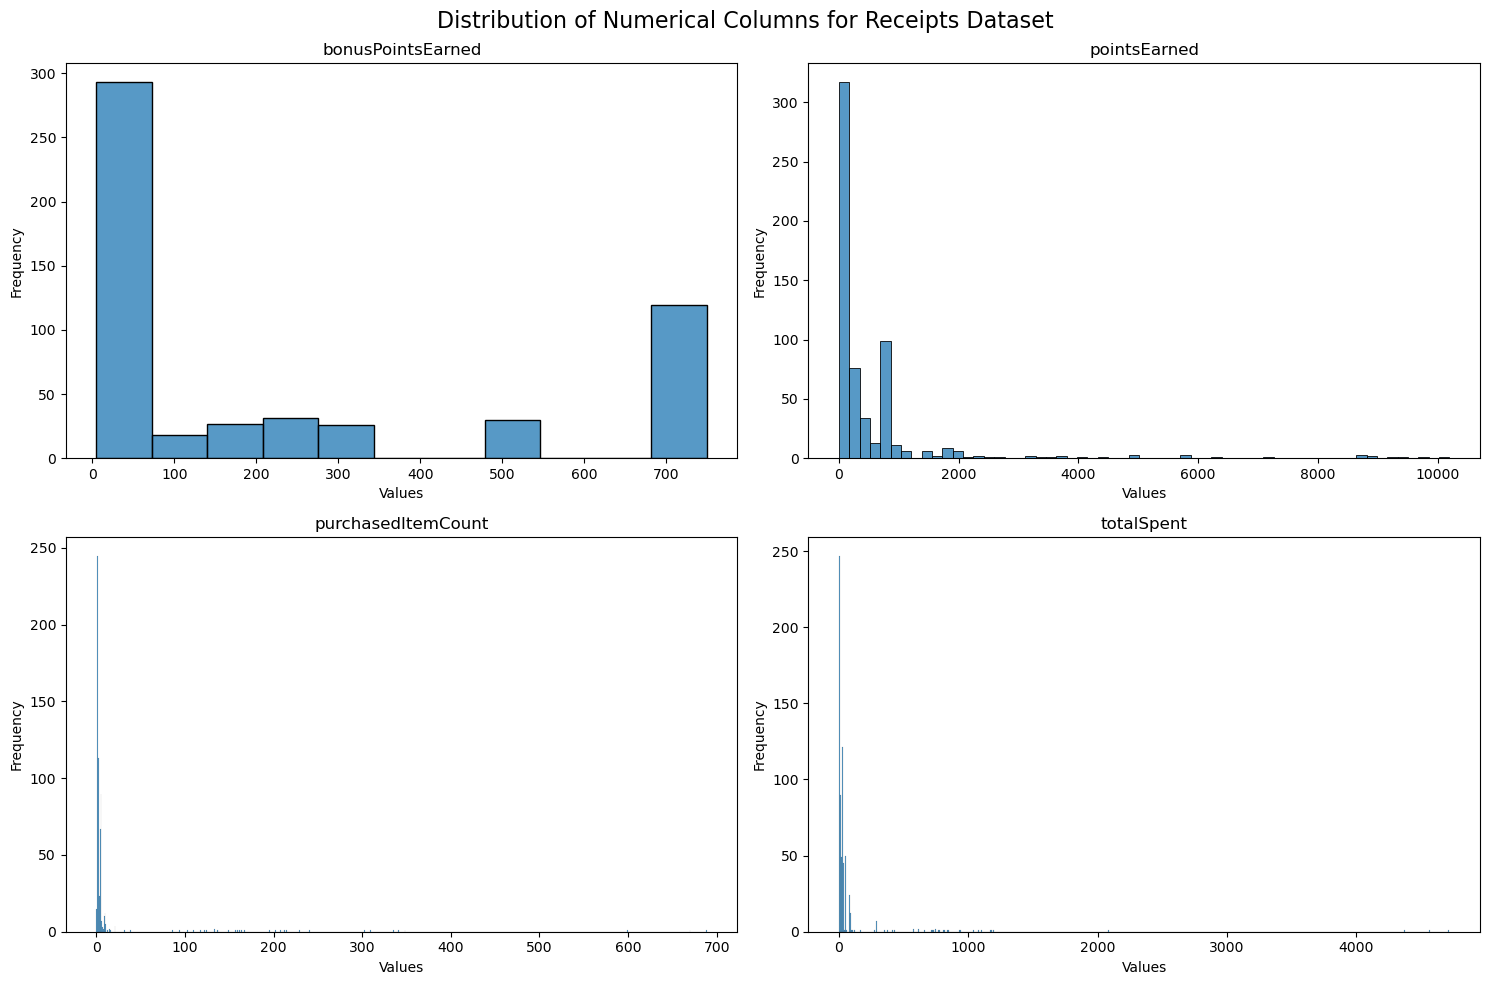

In [ ]:
num_col = ['bonusPointsEarned','pointsEarned','purchasedItemCount','totalSpent']

plot_distribution(receipts,num_col,'Receipts')

> We can see for purchasedItemCount and totalSpent there's a wide distribution. Because it is difficult to visualize in bar plot we will want to use boxplot to examine the distribution (percentile and extreme values).

In [ ]:
def plot_boxplot(df, num_cols, name):
    num_rows = len(num_cols) // 2 + (len(num_cols) % 2 > 0)
    num_cols_per_row = 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 5 * num_rows))
    
    for i, col in enumerate(num_cols):
        row_index = i // num_cols_per_row
        col_index = i % num_cols_per_row
        sns.boxplot(x=df[col], ax=axes[row_index, col_index])
        axes[row_index, col_index].set_title(col)
        axes[row_index, col_index].set_xlabel('Values')
    
    fig.suptitle(f'Boxplot of Numerical Columns for {name} Dataset', fontsize=16)
    plt.tight_layout()
    plt.show()

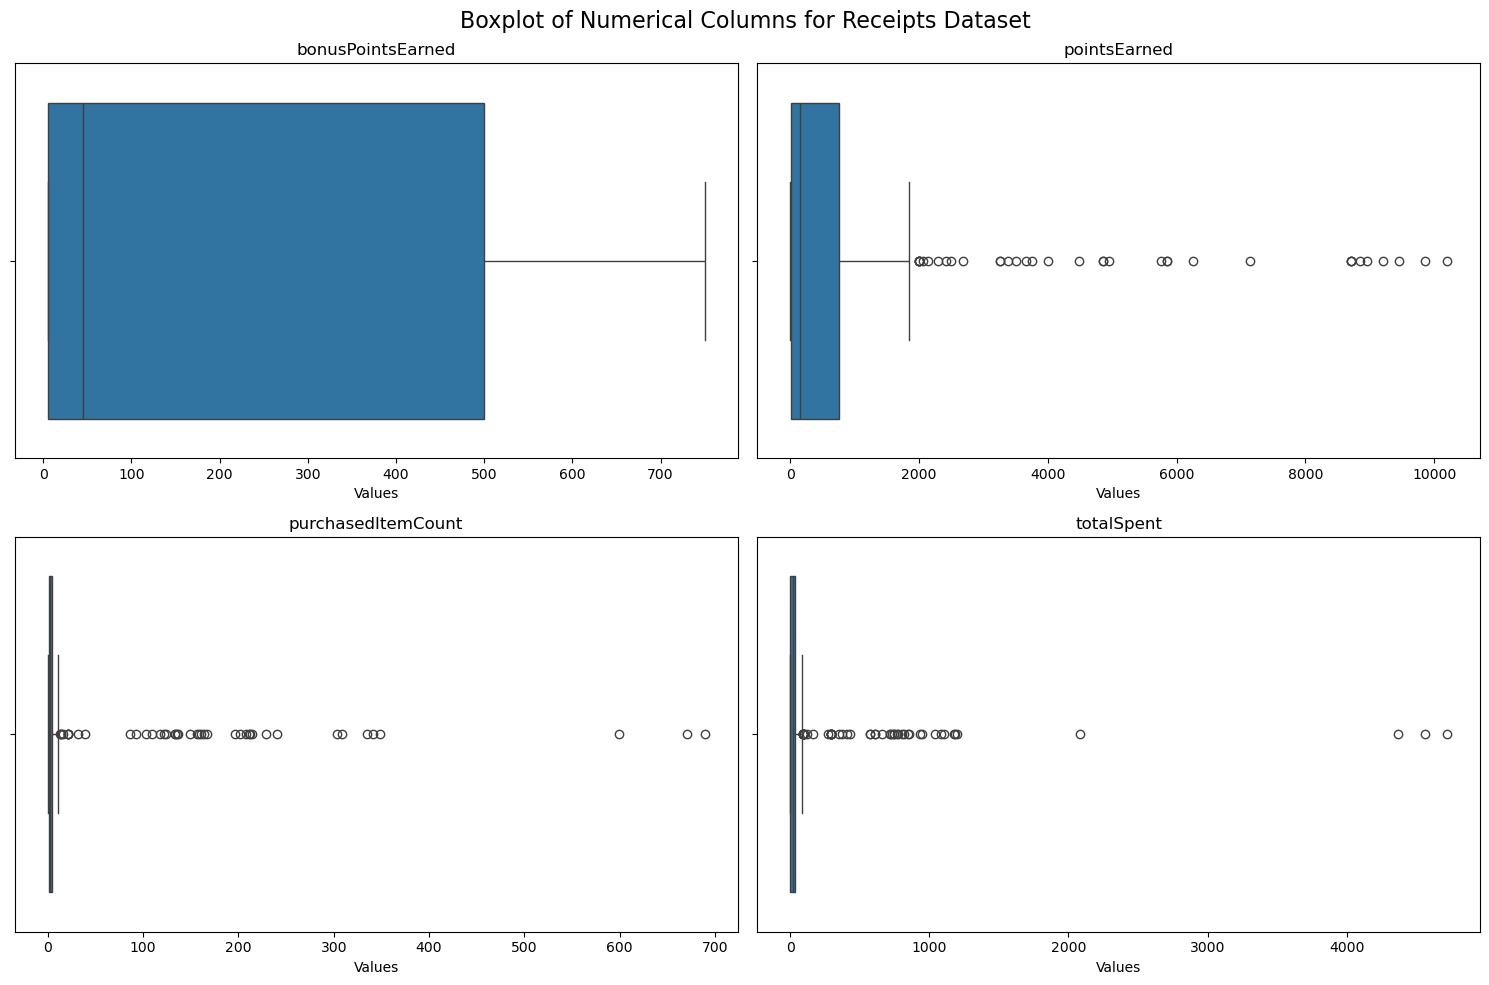

In [ ]:
plot_boxplot(receipts,num_col,'Receipts')

> The bar plot and box plot together suggest that there are some really extreme values for pointsEarned, purchasedItemCount and totalSpent, some outstanding figure of 10,000 for pointsEarned and 4,000 for totalSpent.

> 

### Communication


Dear Manager [xxx],

I am writing to report on my progress and bring up some questions after some data analysis. I am going to briefly update my work progress, issues related to these datasets, and questions to be addressed for further analysis.

I cleaned up all three datasets and examined the relationships between these datasets. Attached is a relational diagram to visualize the columns of each dataset and the relationship between each table. Then I checked the data quality of each dataset, focusing on missing values, duplicate rows, and data distribution and extreme values. 

After this analysis, I have come up with some questions. I believe by solving these questions, we can ensure data quality and prepare for other more in-depth analyses.

1) Each table has a lot of missing information, especially in the table `Item.` I am curious whether such an amount of missingness is normal during business processes or whether there are some recording issues that we need to address.

2) In the `Users` table, there are a lot of duplicated rows. This seems off to me as user identity should be unique. Additionally, the role column in the `Users` table is said to only have one value, but it currently has two values, consumers and fetch staff. I am wondering if there are any changes in business decisions to include more staff. If so, how will these changes impact other processes?

3) In the `Receipts` table, three columns caught my attention. Points Earned has a few points more than 2,000 and some extreme values close to 10,000. What will the mechanism be assigning these points and is such presence of more than 2,000 points normal? What will be the frequency of such presence? 

4) Finally, the data is not consistent. Each column only has generic values and does not have attributes assigned to it. If we want to ensure data quality later, is it possible to enforce attribute assignment when recording?

5) Currently, the dataset is small with only about 1000 rows. If more transactions come, we might need some cloud services to store our data and some other better-performed databases to store this data.

By addressing these issues, I believe we can ensure and maintain the data quality and build more data analysis. 

Thanks for taking your time.

Best,
Pomelo